# Population OSM cities
* Gridded population data are extracted for several cities. These data are later used for performing population downscaling estimates
* A set of urban features are calculated for the French cities (used in the context of population downscaling using a Machine Learning approach)

In [1]:
# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import osmnx as ox
from urbansprawl.core import get_processed_osm_data, get_route_graph
from urbansprawl.parameters import get_population_extract_filename, files
from urbansprawl.population.data_extract import get_extract_population_data
from urbansprawl.population.urban_features import compute_full_urban_features, get_training_testing_data

ox.config(log_file=True, log_console=True, log_name='population_osm_cities', log_filename='population_osm_cities', use_cache=False)
figsize = (12,8)

# Extract OpenStreetMap data from cities
* Buildings
* Building parts
* Points of Interest (POIs)

## Cities to analyse: France
* French cities with more than 150,000 inhabitants: https://en.wikipedia.org/wiki/List_of_the_75_largest_cities_in_France_(2012_census)

In [2]:
# Cities
cities_french = [ "Paris", "Marseille", "Lyon", "Toulouse", "Nice", "Nantes", "Strasbourg", "Montpellier", "Bordeaux", "Rennes", "Reims", "Saint-Étienne", "Toulon", "Grenoble", "Dijon"] 
regions_args = []

# Paris
north, west, south, east = 48.923994, 2.234681, 48.792475, 2.477216
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Marseille
regions_args.append( {"place":"Marseille, France", "which_result":2} )
# Lyon
east, north, south, west = 4.988479, 45.8421941, 45.6606074, 4.725495
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Toulouse
north, west, south, east = 43.669756, 1.344949, 43.536251, 1.518327
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Nice
regions_args.append( {"place":"Nice, France"} )
# Nantes
north, west, south, east = 47.294599, -1.657047, 47.147503, -1.423848
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Strasbourg
north, west, south, east = 48.637827, 7.663381, 48.500269, 7.812597
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Montpellier
north, west, south, east = 43.661329, 3.791819, 43.558116, 3.987571
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Bordeaux
north, west, south, east = 44.919291, -0.686995, 44.773591, -0.479508
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Rennes
north, west, south, east = 48.152259, -1.751516, 48.060092, -1.567830
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Reims
north, west, south, east = 49.318056, 3.922752, 49.186250, 4.135484
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Saint-Étienne
north, west, south, east = 45.480850, 4.243652, 45.378521, 4.488078
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Toulon
north, west, south, east = 43.177904, 5.730857, 43.032650, 6.077037
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Grenoble
north, west, south, east = 45.277655, 5.604533, 45.078518, 5.956952
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )
# Dijon
north, west, south, east = 47.389002, 4.917615, 47.240359, 5.176653
regions_args.append( {"east":east, "north":north, "south":south, "west":west} )

## Cities to analyse: Manhattan, New York

In [3]:
cities_elsewhere = ["Manhattan"]
regions_args.append( {"place":"Manhattan, New York", "which_result":2} )

## Retrieve processed OSM data

In [4]:
# Arguments
process_osm_args = {"retrieve_graph":True, "default_height":3, "meters_per_level":3, "associate_landuses_m2":True, "minimum_m2_building_area":9, 'mixed_building_first_floor_activity': True, "date":None}

for city_ref, region_arg in zip( cities_french + cities_elsewhere , regions_args):
    print(city_ref, region_arg)
    # Process OSM data
    get_processed_osm_data(city_ref, region_args=region_arg, kwargs=process_osm_args)

Paris {'east': 2.477216, 'north': 48.923994, 'south': 48.792475, 'west': 2.234681}
Marseille {'place': 'Marseille, France', 'which_result': 2}
Lyon {'east': 4.988479, 'north': 45.8421941, 'south': 45.6606074, 'west': 4.725495}
Toulouse {'east': 1.518327, 'north': 43.669756, 'south': 43.536251, 'west': 1.344949}
Nice {'place': 'Nice, France'}
Nantes {'east': -1.423848, 'north': 47.294599, 'south': 47.147503, 'west': -1.657047}
Strasbourg {'east': 7.812597, 'north': 48.637827, 'south': 48.500269, 'west': 7.663381}
Montpellier {'east': 3.987571, 'north': 43.661329, 'south': 43.558116, 'west': 3.791819}
Bordeaux {'east': -0.479508, 'north': 44.919291, 'south': 44.773591, 'west': -0.686995}
Rennes {'east': -1.56783, 'north': 48.152259, 'south': 48.060092, 'west': -1.751516}
Reims {'east': 4.135484, 'north': 49.318056, 'south': 49.18625, 'west': 3.922752}
Saint-Étienne {'east': 4.488078, 'north': 45.48085, 'south': 45.378521, 'west': 4.243652}
Toulon {'east': 6.077037, 'north': 43.177904, 's

# Extract gridded population data

* ## Create INSEE gridded population data extracts
    * Resolution ~ 200 meters x 200 meters
    * Downloaded from: https://www.insee.fr/fr/statistiques/2520034
    * Converted to shapefile with following command: ogr2ogr -f 'ESRI Shapefile' carr_pop4326.shp car_m.mif -s_srs EPSG:27572 -t_srs EPSG:4326
* ## Create GPW gridded population data extracts
    * Resolution ~ 1 km x 1 km
    * Downloaded from: http://sedac.ciesin.columbia.edu/data/collection/gpw-v4
    * Converted to shapefile using [Raster to vector] util in QGis

In [5]:
import os.path

### Verify if gridded population data exists
# insee_shapefile points to the shapes of the gridded data
assert( os.path.isfile(files["insee_shapefile"]) )
# insee_data_file pints to the dbf file containing the population count for each grid square
assert( os.path.isfile(files["insee_data_file"]) )

# gpw_population_world points to the shapefile of the gridded population world data
assert( os.path.isfile(files["gpw_population_world"]) )

## Extract GPW data for metropolitan France
* Allow a faster extraction of GPW data for French cities

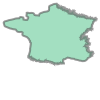

In [6]:
# Get France territory
city_poly = ox.gdf_from_place('Metropolitan France', which_result=1)
# Get metropolitan area
g = city_poly.geometry[0]
polygons = [ poly for poly in g ]
areas = [ poly.area for poly in polygons ]
france_metropolitan = g[ areas.index( max( areas ) ) ]
# Shape
france_metropolitan

In [7]:
try:
    # Extract GPW for metropolitan France
    get_extract_population_data(city_ref="Metropolitan_France", data_source="gpw", pop_shapefile=files["gpw_population_world"], polygon=france_metropolitan)
    # GPW extract name for metropolitan France
    files["gpw_france"] = get_population_extract_filename("Metropolitan_France", "gpw")
except:
    print("No GPW data provided")

## Perform population extracts for each city
* INSEE extract (only for French cities)
    * Higher resolution available; limited to France
* Urban features extraction (only for French cities)
    * Used for population downscaling employing Neural Networks
* GPW (Gridded Population World) extract
    * Lower resolution available; world-wide coverage

In [8]:
### INSEE data: Only french cities
for city_ref in cities_french:
    print("----------")
    print(city_ref)
    
    # Get OSM data
    df_osm_built, df_osm_building_parts, df_osm_pois = get_processed_osm_data(city_ref_file = city_ref)
    
    print("INSEE extract")
    # Extract INSEE region of interest
    df_insee = get_extract_population_data(city_ref=city_ref, data_source="insee", to_crs=df_osm_built.crs, pop_shapefile=files["insee_shapefile"], pop_data_file=files["insee_data_file"], df_osm_built=df_osm_built)
    
    print("Urban features computation")
    # Compute urban features
    urban_features = compute_full_urban_features(city_ref=city_ref, df_osm_built=df_osm_built, df_osm_pois=df_osm_pois, graph=get_route_graph(city_ref), df_insee=df_insee, data_source="insee")
    
    print("Population densities - normalised urban features vector creation")
    # Generate the Y (population densities) and X (normalised urban features) vectors in order to train an algorithm for population downscaling estimates
    get_training_testing_data(city_ref, urban_features)
    
    try:
        print("GPW extract")
        # Extract GPW region of interest
        get_extract_population_data(city_ref=city_ref, data_source="gpw", to_crs=df_osm_built.crs, pop_shapefile=files["gpw_france"], df_osm_built=df_osm_built)
    except:
        print("No GPW data provided")
        
print("**********")
        
try:
    ### GPW data
    for city_ref in cities_elsewhere:
        print(city_ref)
        # Get OSM data
        df_osm_built, _, _ = get_processed_osm_data(city_ref_file = city_ref)
        print("GPW extract")
        # Extract GPW region of interest
        get_extract_population_data(city_ref=city_ref, data_source="gpw", to_crs=df_osm_built.crs, pop_shapefile=files["gpw_population_world"], df_osm_built=df_osm_built)
except:
    print("No GPW data provided")

----------
Paris
INSEE extract
Urban features computation
Population densities - normalised urban features vector creation
GPW extract
----------
Marseille
INSEE extract
Urban features computation
Population densities - normalised urban features vector creation
GPW extract
----------
Lyon
INSEE extract
Urban features computation
Population densities - normalised urban features vector creation
GPW extract
----------
Toulouse
INSEE extract
Urban features computation
Population densities - normalised urban features vector creation
GPW extract
----------
Nice
INSEE extract
Urban features computation
Population densities - normalised urban features vector creation
GPW extract
----------
Nantes
INSEE extract
Urban features computation
Population densities - normalised urban features vector creation
GPW extract
----------
Strasbourg
INSEE extract
Urban features computation
Population densities - normalised urban features vector creation
GPW extract
----------
Montpellier
INSEE extract
Urban f

## Paris
* Population gridded data
    * INSEE data. Resolution ~ 200 m x 200 m
        * Non-existent squares denote a null comprised population
    * Gridded Population of the World (GPW). Resolution ~ 1km x 1km    

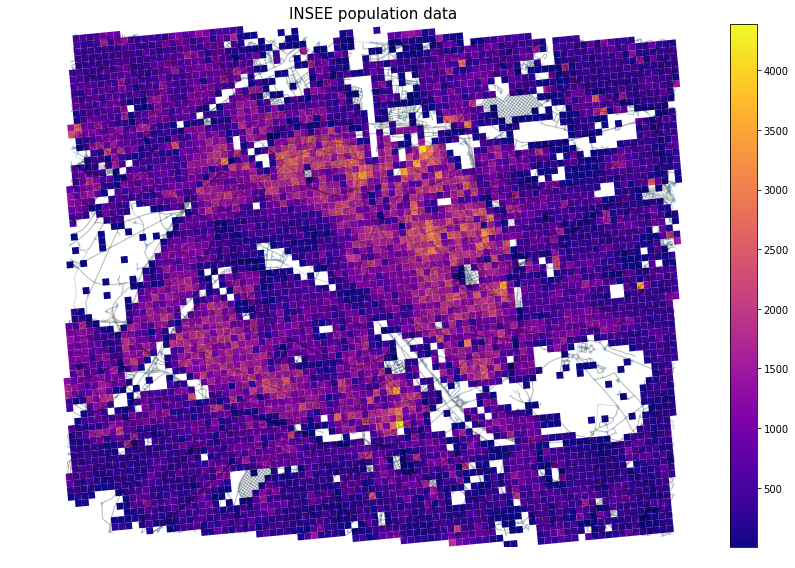

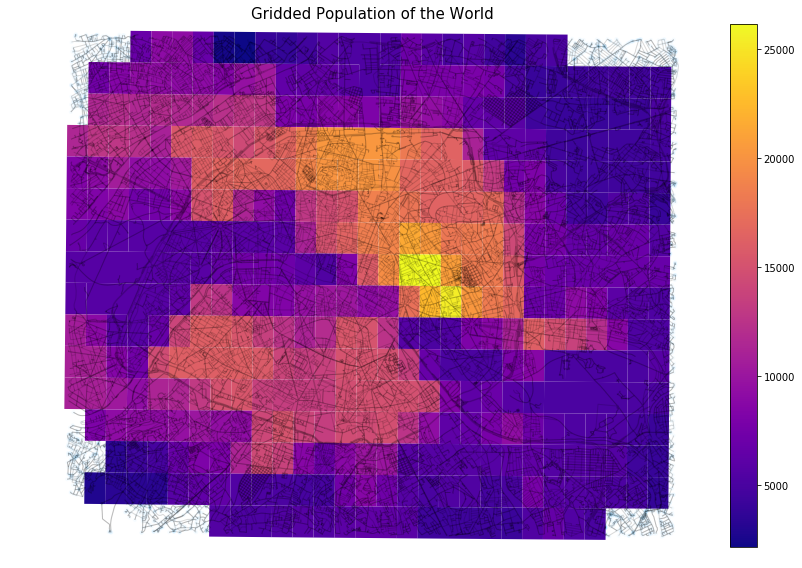

In [9]:
city_ref = "Paris"

# Population data
df_insee = get_extract_population_data(city_ref=city_ref, data_source="insee")
df_gpw = get_extract_population_data(city_ref=city_ref, data_source="gpw")
# Street-network graph
G = get_route_graph(city_ref)

# Plot INSEE
fig, ax = ox.plot_graph(G, fig_height=figsize[1], fig_width=figsize[0], close=False, show=False, edge_color='black', edge_alpha=0.15, node_alpha=0.05)
df_insee.plot("pop_count", ax=ax, cmap='plasma', legend=True)
ax.set_title("INSEE population data", fontsize=15)
fig.tight_layout()

# Plot GPW
fig, ax = ox.plot_graph(G, fig_height=figsize[1], fig_width=figsize[0], close=False, show=False, edge_color='black', edge_alpha=0.15, node_alpha=0.05)
df_gpw.plot("pop_count", ax=ax, cmap='plasma', legend=True)
ax.set_title("Gridded Population of the World", fontsize=15)
fig.tight_layout()

## Paris
* Urban features

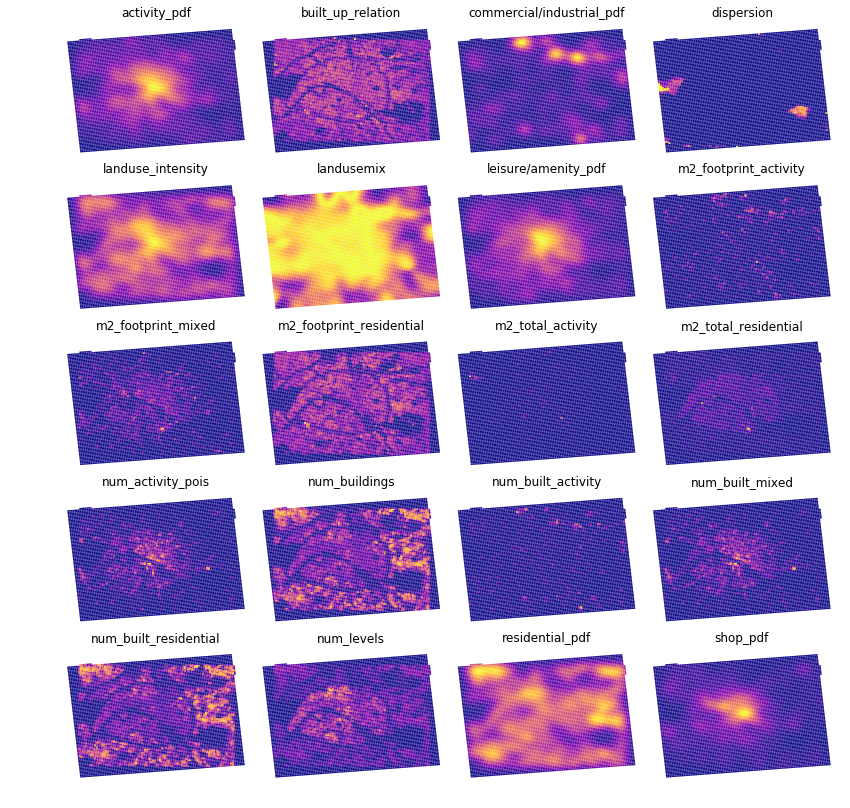

In [10]:
# Get urban features for input city
urban_features = compute_full_urban_features(city_ref=city_ref, data_source="insee")

# Plots
f, axarr = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(14,14))
for ax_row in axarr:
    for ax in ax_row:
        ax.axis('off')

i, j = 0, 0
for col in urban_features.columns:
    # Plot urban feature
    if (col in ['idINSPIRE', 'geometry', 'pop_count']): continue
    urban_features.plot(col, ax=axarr[i,j], cmap='plasma')
    # Title
    axarr[i,j].set_title(col)
    
    j+=1
    if (j==4): j=0; i+=1

f.subplots_adjust(hspace=0.15, wspace=0)

## Population gridded data
* Visualize INSEE population densities for French cities

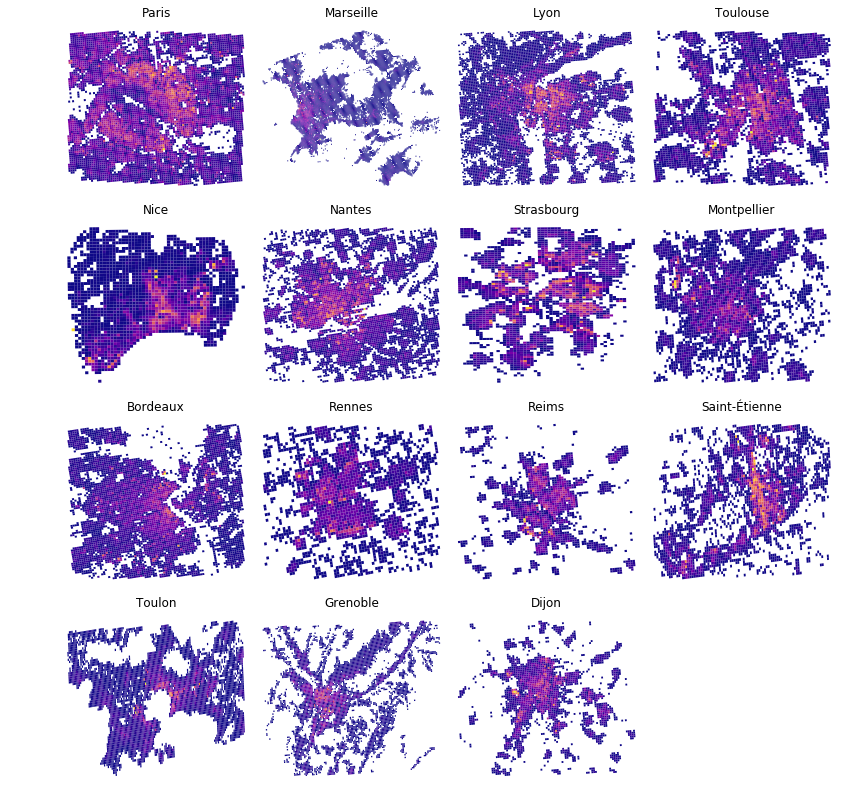

In [11]:
# Plots
f, axarr = plt.subplots(4, 4, sharex=False, sharey=False, figsize=(14,14))
for ax_row in axarr:
    for ax in ax_row:
        ax.axis('off')

i, j = 0, 0
for city_ref in cities_french:
    # Plot population densities
    get_extract_population_data(city_ref=city_ref, data_source="insee").plot("pop_count", ax=axarr[i,j], cmap='plasma')
    # Title
    axarr[i,j].set_title(city_ref)
        
    j+=1
    if (j==4): j=0; i+=1

f.subplots_adjust(hspace=0.15, wspace=0)